# 手写数字分类(Logistic 分类)

## 手写数字分类
由于Logistic回归只能实现二分类，这里先实现1 to 1分类，再训练k个分类器，对k个类别进行分类

In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

载入数据，由于数据集中对"0"的标签为"10"，这里替换为0，查看数据集形状

In [2]:
data = scio.loadmat('ex3data1.mat')
x = data.get('X')
y = data.get('y')
y = np.expand_dims(np.where(y[:,0]==10,0,y[:,0]), axis=1)
x.shape, y.shape

((5000, 400), (5000, 1))

展示一部分数据集图像

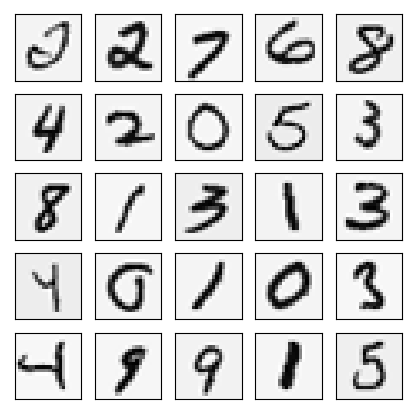

In [11]:
def plot_image(img):
    """ sample 100 image and show them
    assume the image is square
    img: (5000, 400)
    """
    sample_idx = np.random.choice(np.arange(img.shape[0]), 25)  # 100*400
    sample_images = img[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(5, 5))

    for r in range(5):
        for c in range(5):
            ax_array[r, c].matshow(sample_images[5 * r + c].reshape((20, 20)).T,
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


plot_image(x)

对标签实现Onehot编码

In [4]:
from Network import onehot_encode
y_onehot, cls = onehot_encode(y)
y_onehot

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

划分训练集和验证集，统计数据集情况

In [5]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y_onehot, test_size=0.2)
for cls_idx in cls:
    train_sample_n = np.where(train_y[:,cls_idx]==1)[0].shape[0]
    val_sample_n = np.where(val_y[:,cls_idx]==1)[0].shape[0]
    print("Class {}:\t{} train samples\t{} val samples".format(cls_idx, train_sample_n, val_sample_n))
print("Total train samples: {}\n"
      "Total val samples: {}".format(train_y.shape[0],val_y.shape[0]))

train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
train_y_ex.shape

Class 0:	406 train samples	94 val samples
Class 1:	401 train samples	99 val samples
Class 2:	389 train samples	111 val samples
Class 3:	393 train samples	107 val samples
Class 4:	395 train samples	105 val samples
Class 5:	416 train samples	84 val samples
Class 6:	406 train samples	94 val samples
Class 7:	394 train samples	106 val samples
Class 8:	397 train samples	103 val samples
Class 9:	403 train samples	97 val samples
Total train samples: 4000
Total val samples: 1000


(4000, 1, 10)

### One to One分类
使用Logistic回归实现对"0"的分类

In [6]:
from LogisticRegression.LogisticRegression import LogisticRegression

epochs = 200
alpha = 0.1
scale = 10
regularize = "L2"
normalize = False
logistic_reg = LogisticRegression(x=train_x,y=train_y_ex[:,:,0],val_x=val_x,val_y=val_y_ex[:,:,0],epoch=epochs,lr=alpha,scale=scale,normalize=normalize, regularize=regularize)
theta, train_loss, val_loss = logistic_reg.train()
theta.shape

Epoch: 1/200, Train Loss: 0.0704
Accuracy on Val set: 90.60%	Loss on Val set: 0.1045
Epoch: 2/200, Train Loss: 0.1158
Accuracy on Val set: 90.60%	Loss on Val set: 0.1256
Epoch: 3/200, Train Loss: 0.1404
Accuracy on Val set: 90.60%	Loss on Val set: 0.1363
Epoch: 4/200, Train Loss: 0.1531
Accuracy on Val set: 90.60%	Loss on Val set: 0.1413
Epoch: 5/200, Train Loss: 0.1591
Accuracy on Val set: 90.60%	Loss on Val set: 0.1429
Epoch: 6/200, Train Loss: 0.1613
Accuracy on Val set: 90.60%	Loss on Val set: 0.1424
Epoch: 7/200, Train Loss: 0.1610
Accuracy on Val set: 90.60%	Loss on Val set: 0.1405
Epoch: 8/200, Train Loss: 0.1591
Accuracy on Val set: 90.60%	Loss on Val set: 0.1378
Epoch: 9/200, Train Loss: 0.1561
Accuracy on Val set: 90.60%	Loss on Val set: 0.1345
Epoch: 10/200, Train Loss: 0.1526
Accuracy on Val set: 90.60%	Loss on Val set: 0.1309
Epoch: 11/200, Train Loss: 0.1487
Accuracy on Val set: 90.60%	Loss on Val set: 0.1272
Epoch: 12/200, Train Loss: 0.1446
Accuracy on Val set: 90.60%	L

(1, 401)

查看训练过程，此处损失先上升后下降，应该是初始化的问题，参数最开始没有找到好的下降方向

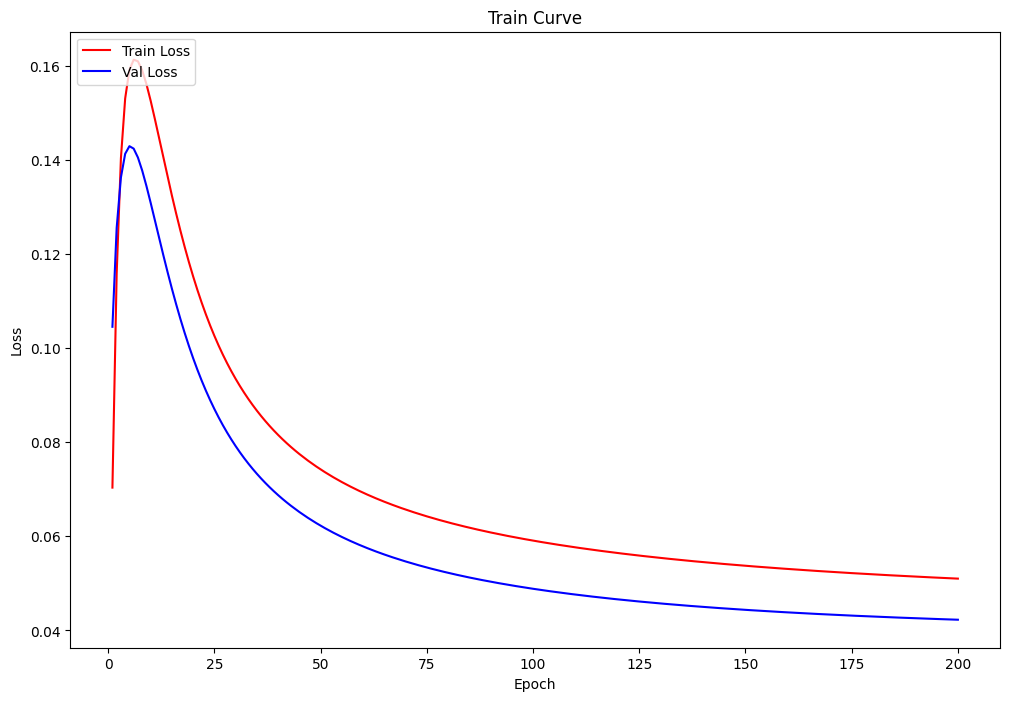

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), train_loss, 'r', label="Train Loss")
ax.plot(np.arange(1,epochs+1), val_loss, 'b', label="Val Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()

查看分类性能

In [8]:
from LogisticRegression.LogisticRegression import bce_loss
from sklearn.metrics import f1_score
pred_prob = logistic_reg.get_prob(x=val_x)
loss_val = bce_loss(pred=pred_prob, target=val_y_ex[:,:,0])

pred = logistic_reg.predict(x=val_x)
logistic_f1 = f1_score(val_y_ex[:,:,0],pred)
acc = logistic_reg.test(x=val_x,y=val_y_ex[:,:,0])
print("Accuracy on Val set: {:.2f}%\n"
      "Val Loss on Val set: {:.4f}\n"
      "F1 Score on Val set: {:.4f}".format(acc * 100, loss_val, logistic_f1))

Accuracy on Val set: 98.50%
Val Loss on Val set: 0.0328
F1 Score on Val set: 0.9153


### One to K分类
训练k个分类器

In [9]:
classifier_list = []
for cls_idx in cls:
    classifier = LogisticRegression(x=train_x,y=train_y_ex[:,:,cls_idx], val_x=val_x, val_y=val_y_ex[:,:,cls_idx], epoch=epochs,lr=alpha,normalize=normalize, regularize="L2", scale=2, show=False)
    classifier.train()
    classifier_list.append(classifier)

print("Total Classifiers: {}".format(len(classifier_list)))

Total Classifiers: 10


进行分类，选择概率最高的类为分类结果，用sklearn进行分类结果统计

In [10]:
# (cls_n, sample_n, 1)
prob_list = [classifier_i.get_prob(val_x) for classifier_i in classifier_list]
# (sample_n, cls_n)
prob_arr = np.array(prob_list).squeeze().T
# (sample_n,)
multi_pred = np.argmax(prob_arr,axis=1)

from sklearn.metrics import classification_report
report = classification_report(multi_pred, np.argmax(val_y, axis=1), digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9574    0.9184    0.9375        98
           1     0.9495    0.8468    0.8952       111
           2     0.8378    0.9118    0.8732       102
           3     0.8505    0.8667    0.8585       105
           4     0.8952    0.8785    0.8868       107
           5     0.6905    0.9062    0.7838        64
           6     0.8830    0.8737    0.8783        95
           7     0.8962    0.9048    0.9005       105
           8     0.8738    0.7965    0.8333       113
           9     0.8351    0.8100    0.8223       100

    accuracy                         0.8690      1000
   macro avg     0.8669    0.8713    0.8669      1000
weighted avg     0.8742    0.8690    0.8699      1000

